In [ ]:
file_ul = {
    "ggZH_HToBB_ZToLL" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/ZH_HToBB_ZToLL/220411_212229/0000/nano_mc2018_9.root",
    "ggZH_HToBB_ZToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToQQ/220404_154416/0000/nano_mc2018_9.root",
    "ggZH_HToBB_ZToNuNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToNuNu/220415_235627/0000/nano_mc2018_16.root",
    "WminusH_HToBB_WToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WminusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/WminusH_HToBB_WToQQ/220528_123904/0000/nano_mc2018_91.root",
    "WminusH_HToBB_WToLNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToLNu/220411_205948/0000/nano_mc2018_98.root",
    "WplusH_HToBB_WToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToQQ/220528_123846/0000/nano_mc2018_9.root",
    "WplusH_HToBB_WToLNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/WHToBB/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/WplusH_HToBB_WToLNu/220411_205948/0000/nano_mc2018_99.root",
    "VBF_HToBB" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/VBFHToBB/VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8/VBFHToBBDipoleRecoilOn/220314_183150/0000/nano_mc2018_9.root",
    "ttH_HToBB" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ttHToBB/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/ttHToBB/220310_201332/0000/nano_mc2018_99.root",
    "ZH_HToBB_ZToQQ" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToQQ/220404_154416/0000/nano_mc2018_9.root",
    "ZH_HToBB_ZToLL" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToLL/220423_225639/0000/nano_mc2018_8.root",
    "ZH_HToBB_ZToNuNu" : "root://cmsxrootd.fnal.gov//store/group/lpcpfnano/jdickins/v2_2/2018/ZHToBB/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/ggZH_HToBB_ZToNuNu/220415_235627/0000/nano_mc2018_9.root",
}

/afs/cern.ch/user/a/adlintul/.local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  warnings.warn(
/afs/cern.ch/user/a/adlintul/.local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/afs/cern.ch/user/a/adlintul/.local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/afs/cern.ch/user/a/adlintul/.local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/afs/cern.ch/user/a/adlintul/.local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnin

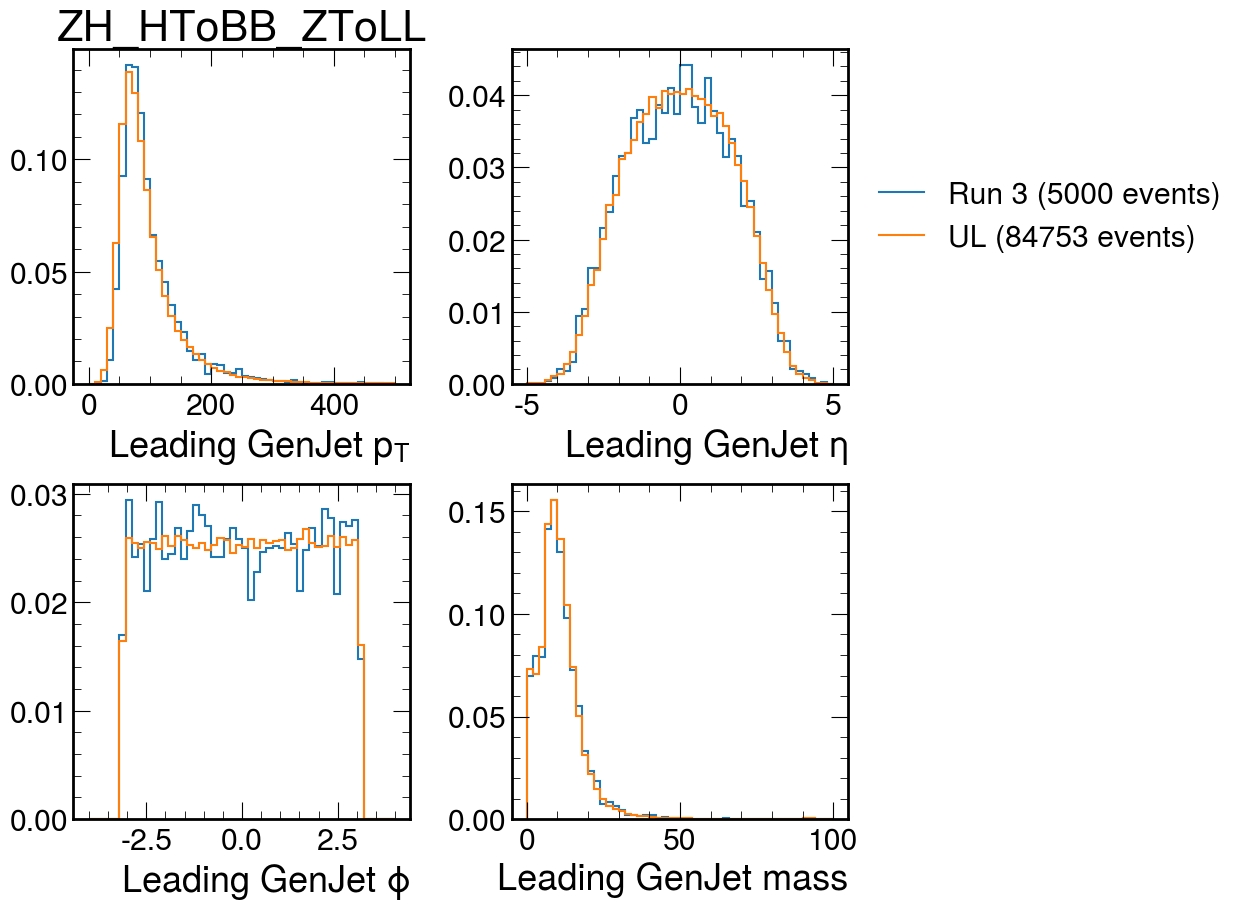

In [4]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

file_run3 = {
    #"VBF_HToBB" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_125058/0000/hadd.root", 
    #"ttH_HToBB" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_125115/0000/hadd.root", 
    #"WminusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WminusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_141837/0000/hadd.root",
    #"WminusH_HToBB_WToLNu" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221220_080323/0000/hadd.root",
    #"WplusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221128_130308/0000/hadd.root",
    #"WplusH_HToBB_WToLNu" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221129_162109/0000/hadd.root",
    #"ggZH_HToBB_ZToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ggZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221122_143227/0000/hadd.root",
    #"ggZH_HToBB_ZToLL" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ggZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221124_150340/0000/hadd.root",
    #"ggZH_HToBB_ZToNuNu" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221227_124201/0000/hadd.root",
    #"ZH_HToBB_ZToQQ" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221229_162417/0000/hadd.root",
    "ZH_HToBB_ZToLL" : "root://cms-xrd-global.cern.ch//store/cmst3/user/adlintul/run3/gridpacks/hbb2022/samples/ZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/NanoGEN/221230_102827/0000/hadd.root",
}

file_ul = {
    "VBF_HToBB" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2500000/272411B5-FA15-354A-96E9-AE4C943C40BB.root",
    "ttH_HToBB" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/40000/A4A2A0A0-06DA-D24D-90B8-1E9768C99635.root",
    "WminusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/WminusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/70000/F9EEE50C-5070-C145-9E89-809AD55B1471.root",
    "WminusH_HToBB_WToLNu" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/WminusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2550000/DA3433BC-633E-EE45-9F49-E35F90A25D06.root",
    "WplusH_HToBB_WToQQ" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/WplusH_HToBB_WToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/70000/2ED82FDF-6644-7843-99D9-6FEFF65802F3.root",
    "WplusH_HToBB_WToLNu" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/WplusH_HToBB_WToLNu_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/50000/BF2B114D-4867-AF47-BC5B-B3DD1EBF7CF4.root",
    "ggZH_HToBB_ZToLL" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ggZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/50000/C2501A2F-7A08-9F45-AB77-82D11BD4FA49.root",
    "ggZH_HToBB_ZToQQ" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ggZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/50000/27C4C131-7906-2348-8BAB-4E3EE07D6DF6.root",
    "ggZH_HToBB_ZToNuNu" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ggZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2530000/C46665C8-E0F1-A34F-852F-1146493AC668.root",
    "ZH_HToBB_ZToQQ" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2820000/FC08EB31-9A28-0842-A01F-F6E482777701.root",
    "ZH_HToBB_ZToLL" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/40000/0C25227E-BD48-AF47-B715-21FE8FDE0F29.root",
    "ZH_HToBB_ZToNuNu" : "root://cms-xrd-global.cern.ch//store/mc/RunIISummer20UL18NanoAODv9/ZH_HToBB_ZToNuNu_M-125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/60000/A6F55055-E06A-6345-87B4-9125D9F64351.root",
}

for process in file_run3.keys():
    
    run3 = NanoEventsFactory.from_root(
        file_run3[process],
        schemaclass=NanoAODSchema
    ).events()


    ul = NanoEventsFactory.from_root(
        file_ul[process],
        schemaclass=NanoAODSchema
    ).events()

    import warnings

    warnings.filterwarnings("ignore", "RuntimeWarning: Missing cross-reference index for")
    warnings.filterwarnings("ignore", "Found duplicate branch")

    import matplotlib.pyplot as plt
    import mplhep
    from hist import Hist
    import hist
    import numpy as np
    plt.style.use(mplhep.style.CMS)

    def fill(var):
        return ak.to_numpy(var)

    h_run3 = Hist(
        hist.axis.Regular(50, 0, 500, name="pt", label=r"Leading GenJet $p_T$"),
        hist.axis.Regular(50, -5, 5, name="eta", label=r"Leading GenJet $\eta$"),
        hist.axis.Regular(50, -4, 4, name="phi", label=r"Leading GenJet $\phi$"),
        hist.axis.Regular(50, 0, 100, name="mass", label=r"Leading GenJet mass"),
    )
    
    h_ul = h_run3.copy()

    jet = ak.firsts(run3.GenJet)

    h_run3.fill(fill(jet.pt), fill(jet.eta), fill(jet.phi), fill(jet.mass))

    jet = ak.firsts(ul.GenJet)

    h_ul.fill(fill(jet.pt), fill(jet.eta), fill(jet.phi), fill(jet.mass))

    fig, axs = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=.3, wspace=.3)
    axs[0,0].set_title(process)

    row, column = 0, 0

    for var in ["pt", "eta", "phi", "mass"]:

        if column > 1:
            row = 1
            column = 0

        mplhep.histplot(h_run3.project(var)*(1/h_run3.project(var)[{var : sum}]), ax = axs[row, column], label = "Run 3 ({0} events)".format(ak.sum(run3.run)))
        mplhep.histplot(h_ul.project(var)*(1/h_ul.project(var)[{var : sum}]), ax = axs[row, column], label = "UL ({0} events)".format(ak.sum(ul.run)))

        column += 1

    lgd = axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #fig.savefig('{0}.pdf'.format(process), bbox_extra_artists=(lgd,), bbox_inches='tight')